In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [30]:
from sklearn import datasets


In [31]:
iris=datasets.load_iris()

In [32]:
data=pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [33]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
data['target']=iris.target

In [35]:
data = data[(data['target'] == 0) | (data['target'] == 1)]


In [36]:
data=data.drop(columns=['sepal length (cm)','sepal width (cm)'])

In [37]:
from sklearn.linear_model

SyntaxError: invalid syntax (3761924447.py, line 1)

In [38]:
y=data['target']
x=data.drop(columns='target')
# Convert x to a numpy array to enable 2D slicing
x = x.values
y = y.values


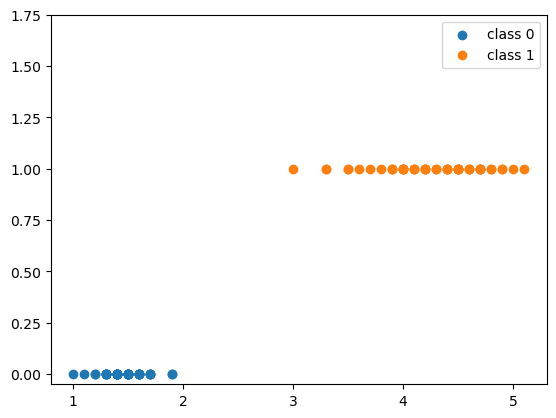

In [39]:
import matplotlib.pyplot as plt
import numpy as np



# Plot the data points
plt.scatter(x[:51, 0], y[:51], label='class 0')
plt.scatter(x[51:, 0], y[51:], label='class 1')

# Set y-axis ticks to increase by 0.25 from 0 to 1.75
plt.yticks(np.arange(0, 1.76, 0.25))  # y-axis ticks from 0 to 1.75 increasing by 0.25

plt.legend()
plt.show()


In [40]:
from sklearn.svm import SVC


In [ ]:
model=SVC(kernel='linear',C=1e10,)


In [51]:
model.fit(x,y)

SVC(C=10000000000.0, kernel='linear')

In [43]:
data

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [44]:
from sklearn.metrics import classification_report,accuracy_score

In [45]:
model.coef_

array([[1.29411744, 0.82352928]])

In [46]:
model.intercept_

array([-3.78823471])

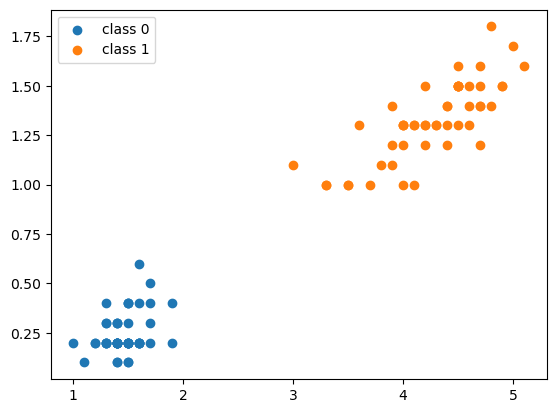

In [47]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Select only setosa and versicolor classes
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Plot the data points for the two classes
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="class 1")
plt.legend()
plt.show()


In [59]:
def plot_svc_decision_boundary(model,xmin,xmax):
    w=model.coef_[0]
    b=model.intercept_[0]
     # formula for the decision boundary is b+w1x1+w2x2=0
    # x1=-w0/w1*x0-b/w1

    x0=np.linspace(xmin,xmax,200)
    decision_boundary=-w[0]/w[1]*x0-b/w[1]
    margin=1/w[1]
    gutter_up=decision_boundary+margin
    gutter_down =decision_boundary-margin
    svs=model.support_vectors_
    plt.scatter(svs[:,0],svs[:,1],s=180,facecolors='#FFAAAA')
    plt.plot(x0,decision_boundary,"k--",linewidth=2)
    plt.plot(x0,gutter_down,"k--",linewidth=2)
    

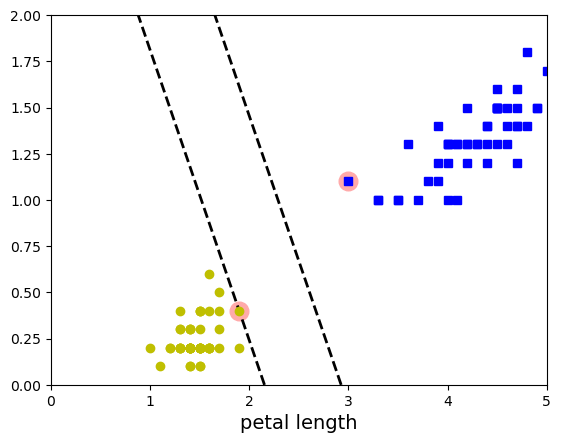

In [60]:
plot_svc_decision_boundary(model,0,5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],"bs")
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo")
plt.xlabel("petal length",fontsize=14)
plt.axis([0,5,0,2])
plt.show()